In [5]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

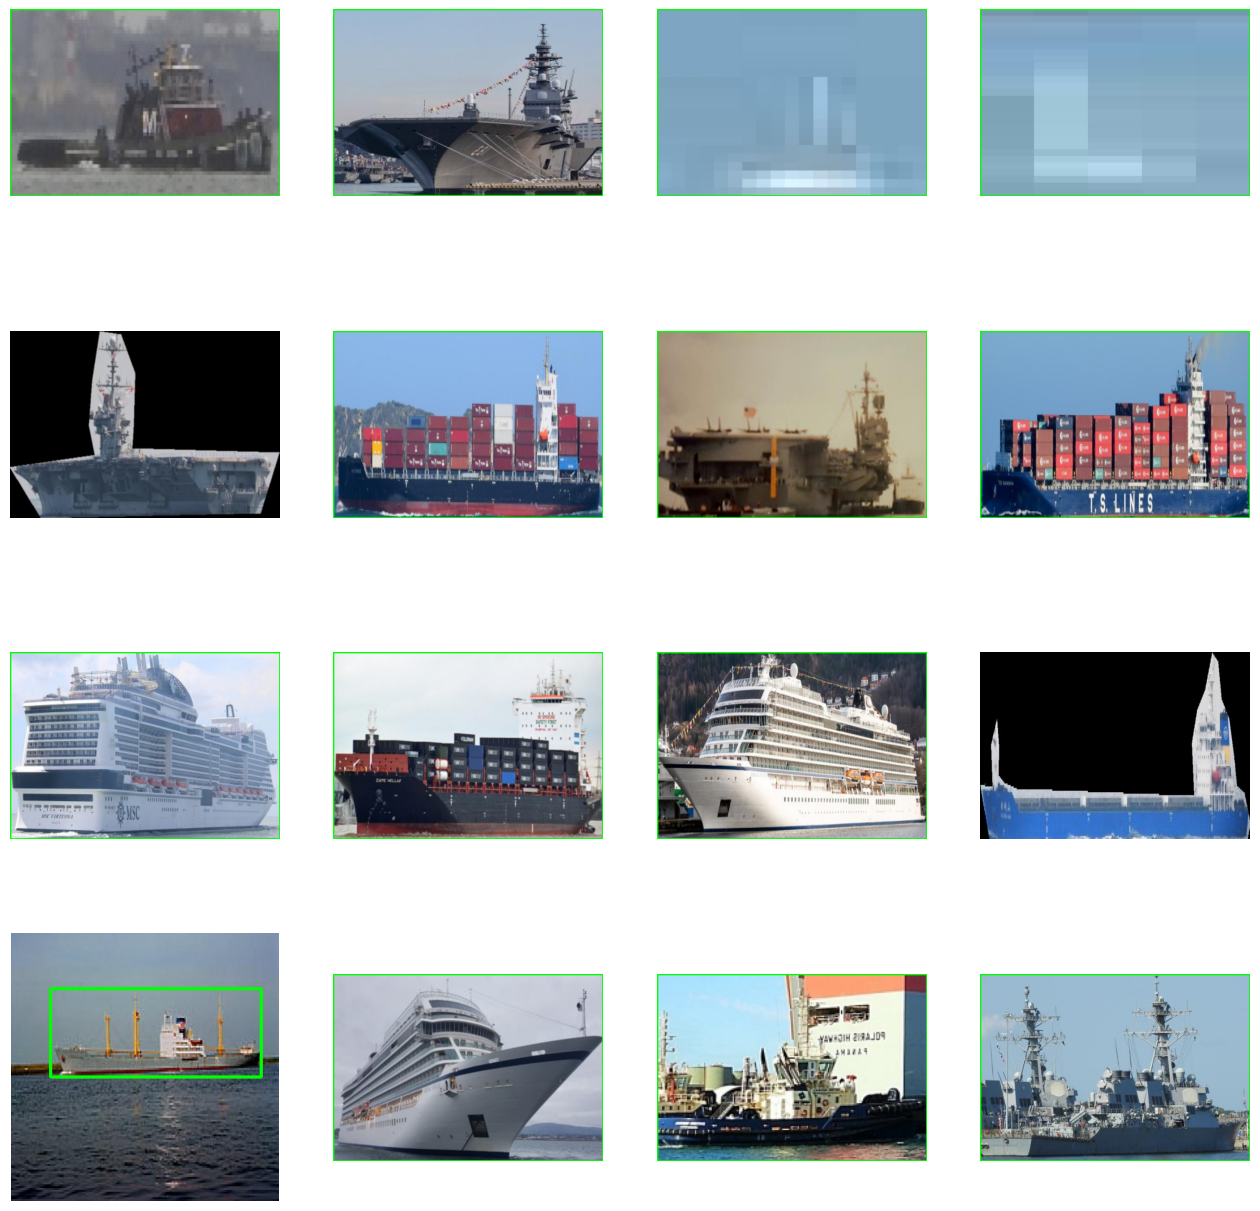

In [7]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/ships-dataset/Ships dataset augmented/train/images"
train_labels = "/kaggle/input/ships-dataset/Ships dataset augmented/train/labels"

test_images = "/kaggle/input/ships-dataset/Ships dataset augmented/test/images"
test_labels = "/kaggle/input/ships-dataset/Ships dataset augmented/test/labels"

val_images = "/kaggle/input/ships-dataset/Ships dataset augmented/valid/images"
val_labels = "/kaggle/input/ships-dataset/Ships dataset augmented/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [8]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/ships-dataset/Ships dataset augmented/test/images/AIDACOSMA-14_jpg.rf.44658357f6f83d9d9c51e56e974cc851.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 600x416 and 3 channels.


In [9]:
 # Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/input/ships-dataset/Ships dataset augmented/data.yaml',
            epochs = 20,
            imgsz = height,
            seed = 42,
            batch = 8,
            workers = 4)

100%|██████████| 131M/131M [00:00<00:00, 318MB/s] 


Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/ships-dataset/Ships dataset augmented/data.yaml, epochs=20, patience=50, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 16.2MB/s]
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/ships-dataset/Ships dataset augmented/train/labels... 8604 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8604/8604 [00:34<00:00, 249.40it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/ships-dataset/Ships dataset augmented/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 299, len(boxes) = 8948. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/ships-dataset/Ships dataset augmented/valid/labels... 1205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1205/1205 [00:04<00:00, 263.77it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-dataset/Ships dataset augmented/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 32, len(boxes) = 1327. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       4.1G     0.3218        1.1          1          8        416: 100%|██████████| 1076/1076 [06:59<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:18<00:00,  4.08it/s]

                   all       1205       1327      0.764      0.664      0.763      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.56G     0.2867     0.8756     0.9724          9        416: 100%|██████████| 1076/1076 [06:45<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.42it/s]

                   all       1205       1327      0.839      0.818      0.859      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.56G     0.2457     0.7612     0.9549          8        416: 100%|██████████| 1076/1076 [06:42<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.39it/s]

                   all       1205       1327      0.791      0.814      0.837      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.56G     0.2258      0.664     0.9439         15        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.40it/s]

                   all       1205       1327       0.82      0.862      0.886      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.56G     0.2054     0.6125      0.938         12        416: 100%|██████████| 1076/1076 [06:42<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.40it/s]

                   all       1205       1327      0.737      0.841      0.853      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.57G     0.1898     0.5573     0.9341         15        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.41it/s]

                   all       1205       1327      0.886      0.874      0.884      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.56G     0.1789      0.517     0.9288         10        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.42it/s]

                   all       1205       1327      0.868      0.883      0.907       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.57G     0.1672     0.4668     0.9231          9        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.36it/s]

                   all       1205       1327      0.874      0.926      0.916      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.56G     0.1653     0.4483     0.9251         12        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.39it/s]

                   all       1205       1327      0.858       0.84      0.895      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.56G     0.1611     0.4404     0.9234         11        416: 100%|██████████| 1076/1076 [06:42<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.40it/s]

                   all       1205       1327       0.86      0.916      0.913      0.885


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.56G     0.2011     0.3467     0.9391          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.42it/s]

                   all       1205       1327      0.839       0.93      0.919      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.56G     0.1902     0.3209     0.9365          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.40it/s]

                   all       1205       1327      0.821      0.909      0.895      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.56G      0.177     0.2916     0.9211          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.38it/s]

                   all       1205       1327      0.831      0.911      0.908      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.56G     0.1704     0.2536     0.9167          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.39it/s]

                   all       1205       1327      0.835      0.923      0.913      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.57G     0.1616     0.2311     0.9127          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.42it/s]

                   all       1205       1327      0.894      0.899      0.927        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.56G     0.1536     0.2186     0.9047          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.38it/s]

                   all       1205       1327      0.874       0.92      0.896      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.56G     0.1482     0.1978     0.9021          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.41it/s]

                   all       1205       1327      0.855      0.904      0.917      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.56G      0.144     0.1866     0.9014          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.42it/s]

                   all       1205       1327      0.897      0.915      0.934      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.57G     0.1385     0.1714     0.8978          4        416: 100%|██████████| 1076/1076 [06:41<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.42it/s]

                   all       1205       1327      0.874        0.9       0.94      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.56G     0.1341     0.1619      0.896          4        416: 100%|██████████| 1076/1076 [06:42<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:17<00:00,  4.39it/s]

                   all       1205       1327       0.87      0.916      0.935      0.907



20 epochs completed in 2.360 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:18<00:00,  4.19it/s]


                   all       1205       1327      0.874        0.9       0.94      0.912
      Aircraft Carrier       1205        712      0.869      0.696      0.857      0.594
               Bulkers       1205         23      0.886      0.913      0.982      0.976
          fishing boat       1205        179      0.995      0.994      0.995      0.995
           Car Carrier       1205         82      0.977      0.976      0.993      0.993
        Container Ship       1205         72      0.989          1      0.995      0.995
                Cruise       1205         84      0.993          1      0.995      0.995
                   DDG       1205         11       0.51      0.636      0.673      0.673
          Recreational       1205         15      0.617      0.867      0.928       0.92
              Sailboat       1205         72       0.97          1      0.995      0.995
             Submarine       1205         77      0.937      0.922      0.983      0.983
Speed: 0.1ms preproce

lr/pg0,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▁▅▄▆▅▆▇▇▆▇▇▆▇▇▇▆▇███
metrics/mAP50-95(B),▁▅▄▆▄▆▇▇▆▇▇▆▇▇█▆▇███
metrics/precision(B),▂▅▃▅▁█▇▇▆▆▅▅▅▅█▇▆█▇▇
metrics/recall(B),▁▅▅▆▆▇▇█▆██▇██▇█▇█▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▅▄▄▃▃▂▂▂▃▃▃▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dae33f51060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

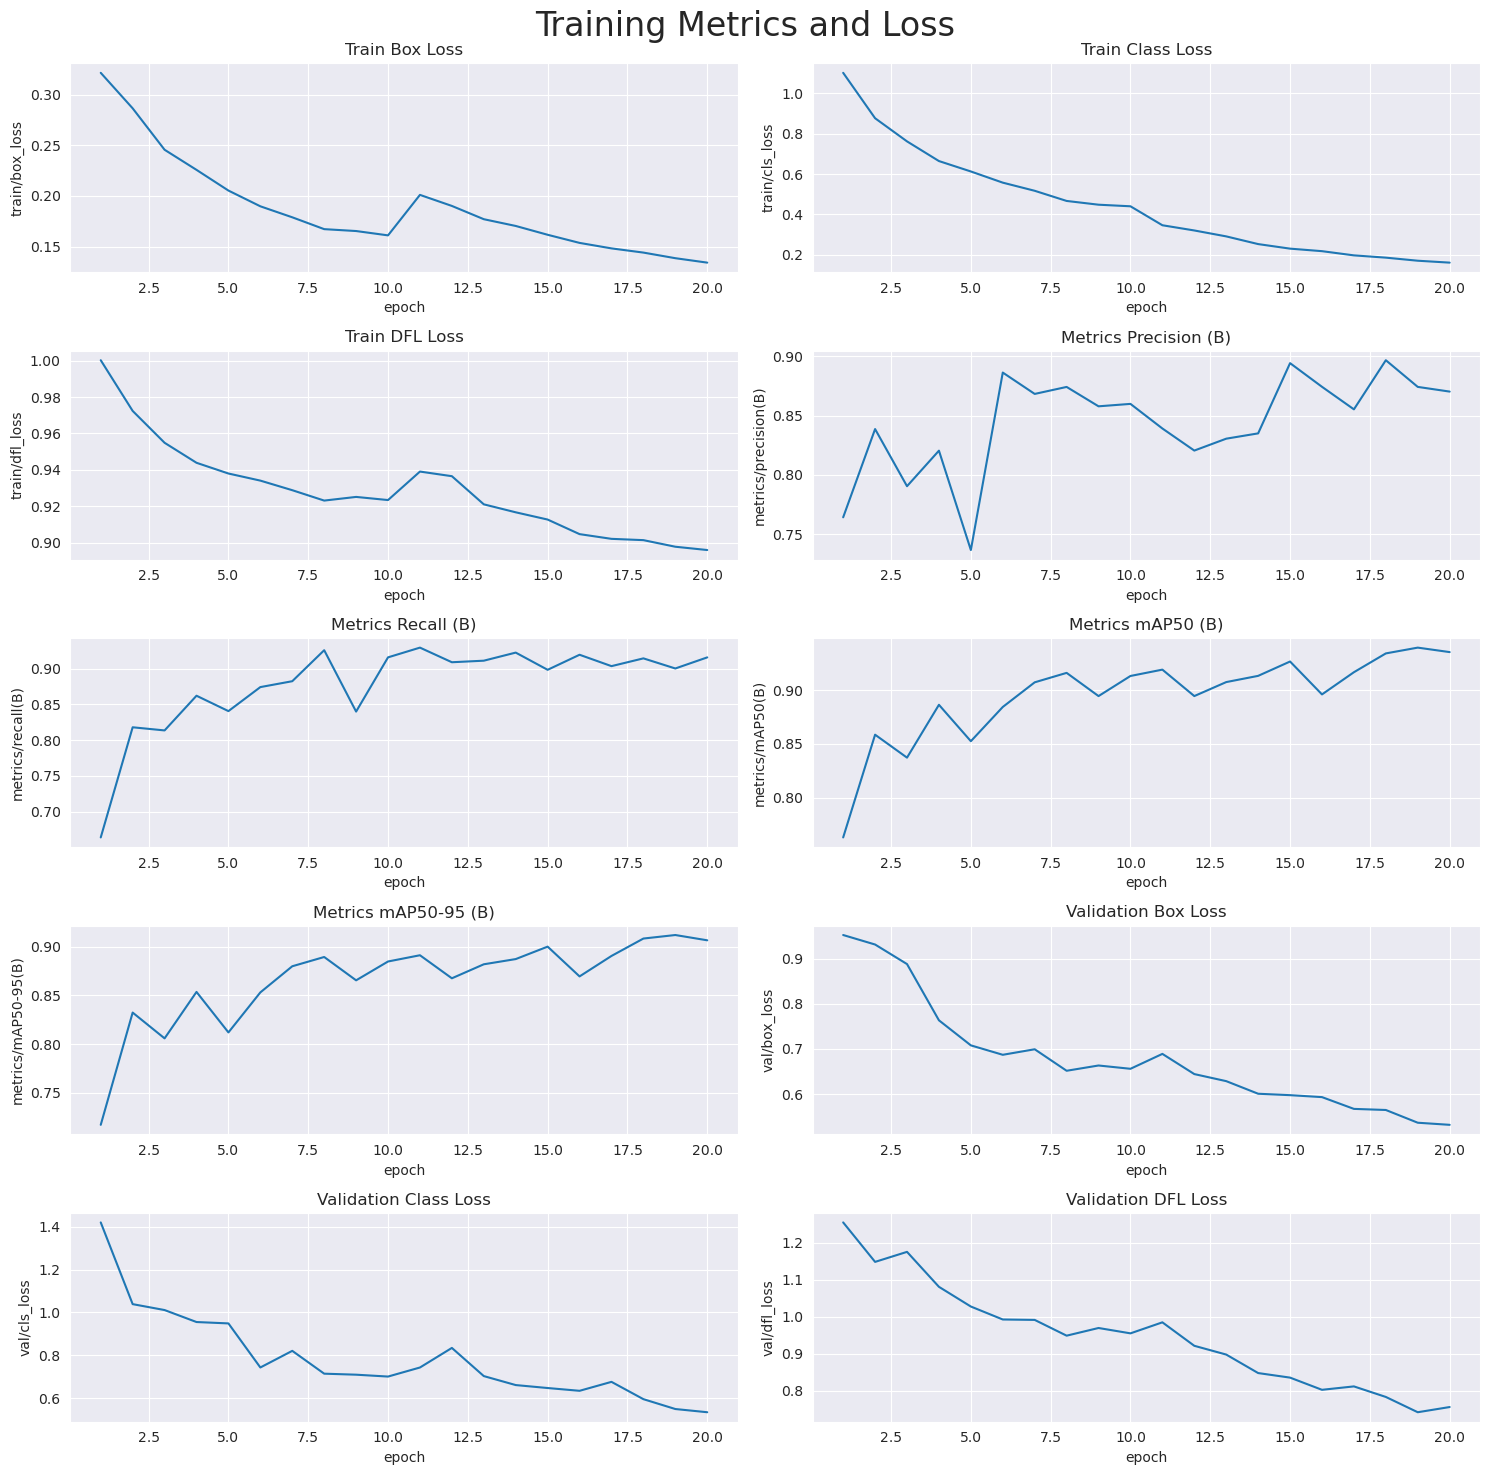

In [10]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


In [11]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.226 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/input/ships-dataset/Ships dataset augmented/test/labels... 381 images, 0 backgrounds, 0 corrupt: 100%|██████████| 381/381 [00:01<00:00, 279.68it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/ships-dataset/Ships dataset augmented/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 22, len(boxes) = 381. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:05<00:00,  4.40it/s]


                   all        381        381      0.976      0.952      0.976      0.974
      Aircraft Carrier        381         44      0.987          1      0.995      0.995
               Bulkers        381         14      0.958      0.857      0.918      0.918
          fishing boat        381         90          1          1      0.995      0.995
           Car Carrier        381         48      0.959      0.958      0.988      0.988
        Container Ship        381         39          1      0.974      0.987      0.987
                Cruise        381         42          1          1      0.995      0.995
                   DDG        381         16          1      0.754      0.906      0.906
          Recreational        381         15      0.988          1      0.995      0.988
              Sailboat        381         38          1          1      0.995      0.995
             Submarine        381         35      0.872      0.971      0.982      0.978
Speed: 0.2ms preproce

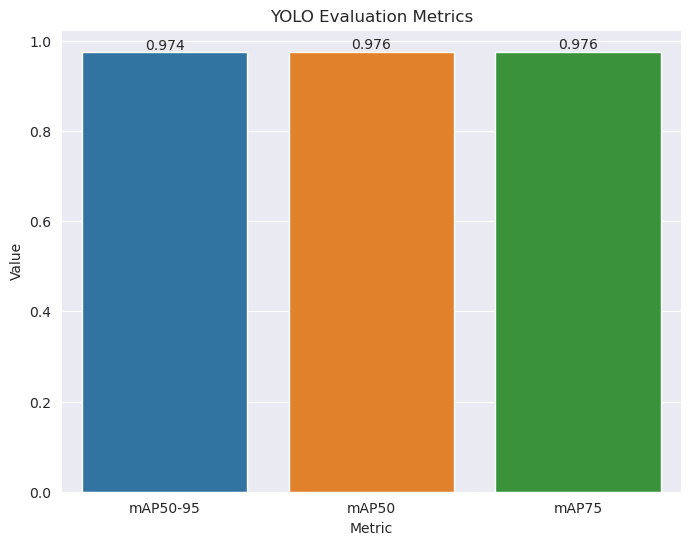

In [12]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

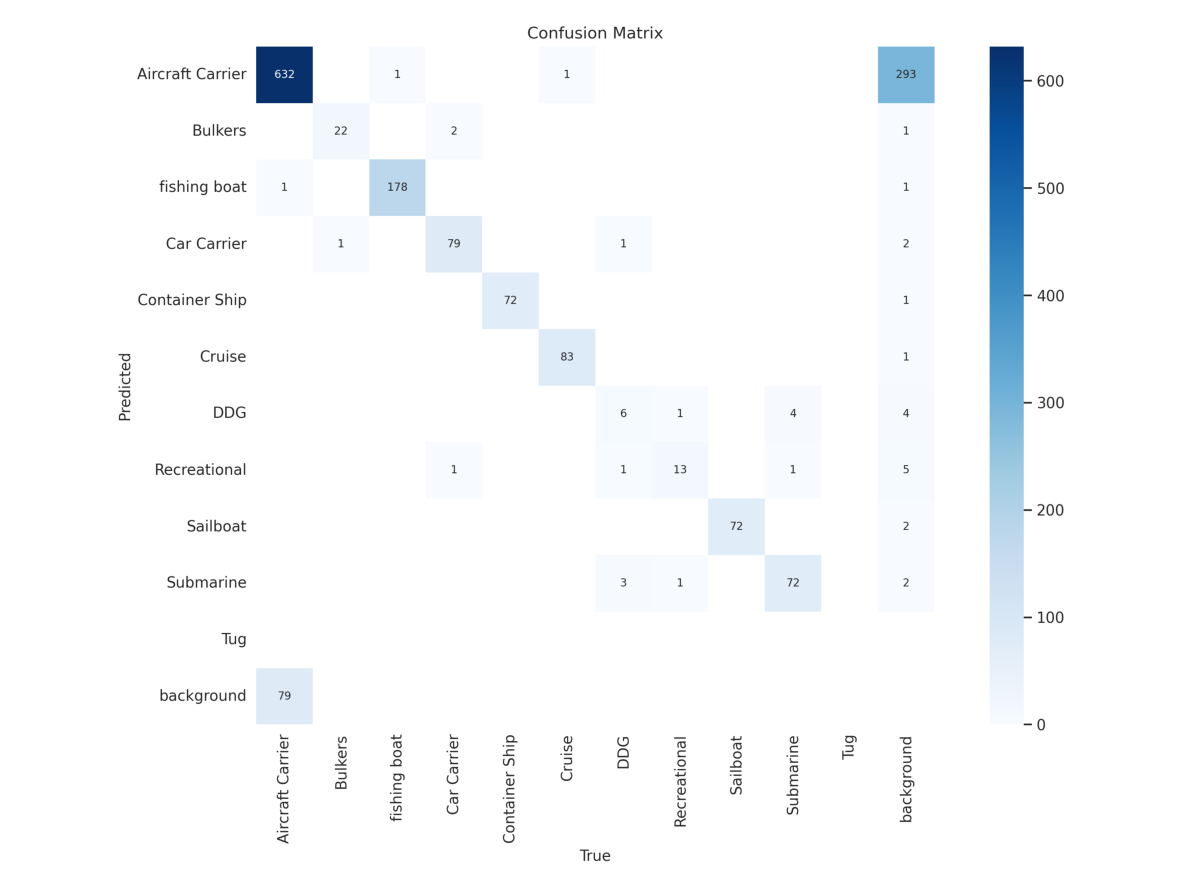

In [15]:

%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [16]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 288x416 1 Aircraft Carrier, 84.6ms
Speed: 2.9ms preprocess, 84.6ms inference, 2.6ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Cruise, 19.9ms
Speed: 1.6ms preprocess, 19.9ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Recreational, 20.0ms
Speed: 1.3ms preprocess, 20.0ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Aircraft Carrier, 1 Car Carrier, 1 Container Ship, 19.9ms
Speed: 1.4ms preprocess, 19.9ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Bulkers, 19.5ms
Speed: 1.7ms preprocess, 19.5ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Car Carrier, 18.7ms
Speed: 1.2ms preprocess, 18.7ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Aircraft Carrier, 18.7ms
Speed: 1.3ms preprocess, 18.7ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 Cruise, 18.6ms
Speed: 1.3ms p

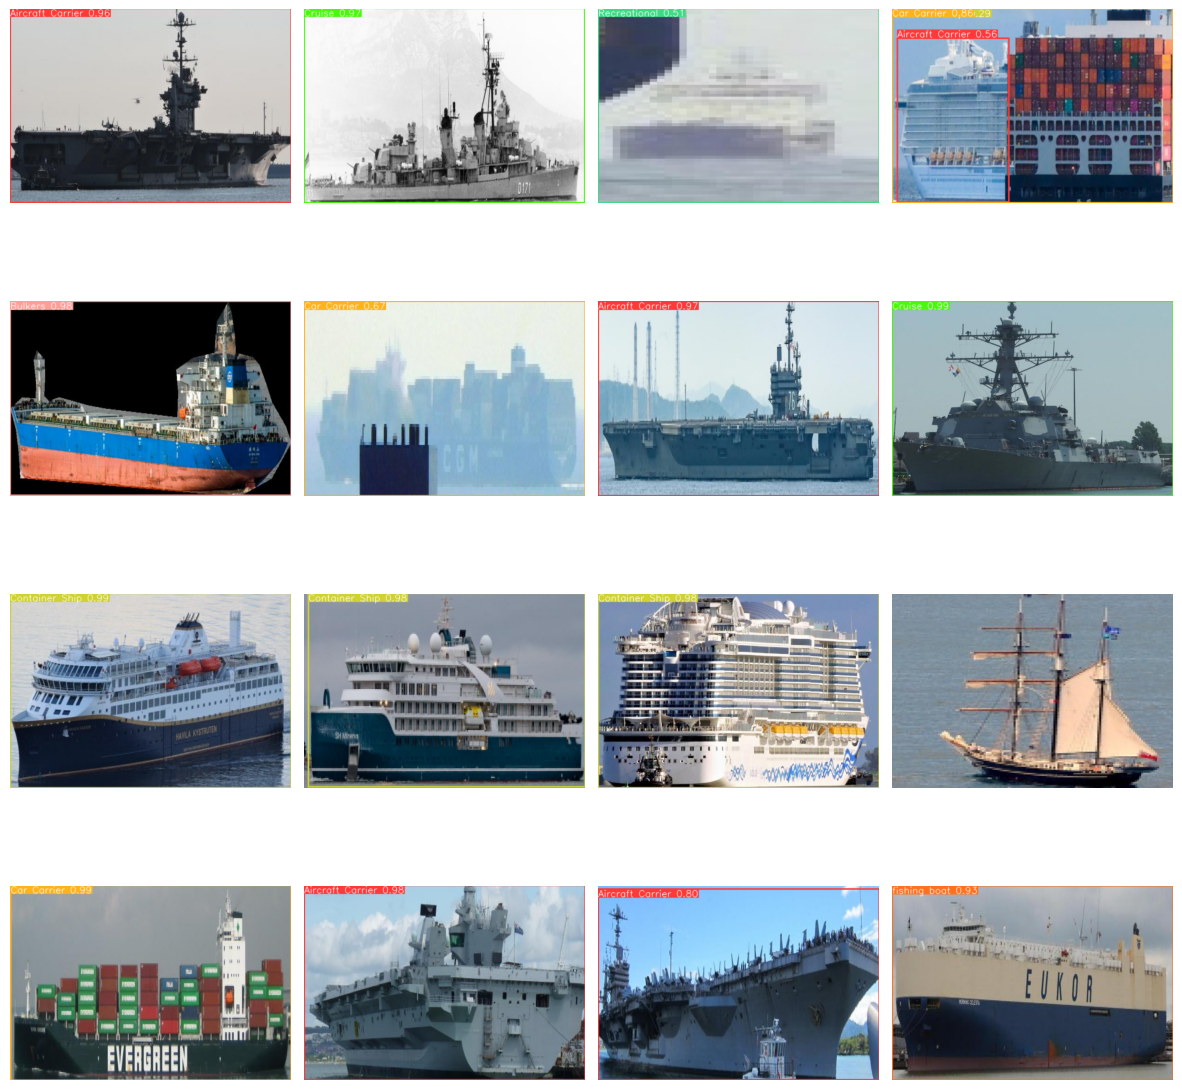

In [17]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-dataset/Ships dataset augmented/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


0: 448x640 1 boat, 77.8ms
Speed: 2.0ms preprocess, 77.8ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
La boîte ne contient pas d'informations de classe et de confiance.


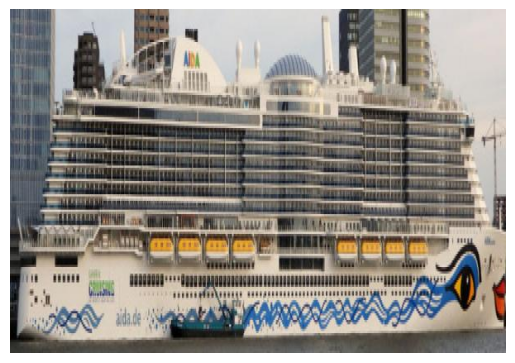

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# Charger le modèle pré-entraîné
model = YOLO('/kaggle/working/yolov8x.pt')  # Remplacez par le chemin vers votre modèle pré-entraîné

# Chemin de l'image à tester
image_path = '/kaggle/input/ships-dataset/Ships dataset augmented/test/images/AIDACOSMA-14_jpg.rf.44658357f6f83d9d9c51e56e974cc851.jpg'  # Remplacez par le chemin de votre image

# Vérifier si le fichier image existe
if os.path.exists(image_path):
    # Charger l'image avec OpenCV
    image = cv2.imread(image_path)

    # Effectuer la détection sur l'image
    results = model(image)

    # Parcourir les résultats de la détection et afficher chaque détection individuellement
    for i, det in enumerate(results):
        for bbox in det.boxes.xyxy:
            x, y, w, h = bbox[:4].tolist()
            
            # Vérifier si la boîte contient des informations de classe et de confiance
            if len(bbox) >= 6:
                conf, class_id = bbox[4:6].tolist()
                conf, class_id = float(conf), int(class_id)
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(image, f"Class {class_id} - Conf {conf:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            else:
                # Traiter le cas où les informations de classe et de confiance ne sont pas disponibles
                print("La boîte ne contient pas d'informations de classe et de confiance.")

    # Afficher l'image avec les boîtes englobantes dessinées
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print(f"Image not found at path: {image_path}")
